In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.cluster import KMeans;
from sklearn.decomposition import PCA;
from sklearn.preprocessing import normalize
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

Задание 1: Загрузите прилагающийся датасет credit_data.

In [ ]:
data = pd.read_csv(r'credit_data.csv',delimiter=',')
data

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad
...,...,...,...,...,...,...,...,...,...,...,...
995,995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good
996,996,40,male,3,own,little,little,3857,30,car,good
997,997,38,male,2,own,little,NaN,804,12,radio/TV,good
998,998,23,male,2,free,little,little,1845,45,radio/TV,bad


In [ ]:
print(data.isna().sum())

Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64


In [ ]:
target = data['Risk']
data = data.drop(['Risk','Unnamed: 0', 'Purpose'], axis=1)

Задание 2: Проверьте датасет на наличие текстовых атрибутов. Замените текстовые атрибуты на числовые без потери качества данных.

In [ ]:
data['Saving accounts'] = data['Saving accounts'].map({"little":1,"moderate":2,"quite rich":3 ,"rich":4 });
data['Checking account'] = data['Checking account'].map({"little":1,"moderate":2,"rich":3 });
target = target.map({"good":1,"bad":0});
data['Saving accounts'] = data['Saving accounts'].fillna(0)
data['Checking account'] = data['Checking account'].fillna(0)

In [ ]:
new_data = pd.get_dummies(data)
new_data.head()

,Age,Job,Saving accounts,Checking account,Credit amount,Duration,Sex_female,Sex_male,Housing_free,Housing_own,Housing_rent
0,67,2,0.0,1.0,1169,6,0,1,0,1,0
1,22,2,1.0,2.0,5951,48,1,0,0,1,0
2,49,1,1.0,0.0,2096,12,0,1,0,1,0
3,45,2,1.0,1.0,7882,42,0,1,1,0,0
4,53,2,1.0,1.0,4870,24,0,1,1,0,0


Задание 3: Выведите информацию о количественных параметрах датасета;

In [ ]:
new_data.shape

(1000, 11)

In [ ]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1000 non-null   int64  
 1   Job               1000 non-null   int64  
 2   Saving accounts   1000 non-null   float64
 3   Checking account  1000 non-null   float64
 4   Credit amount     1000 non-null   int64  
 5   Duration          1000 non-null   int64  
 6   Sex_female        1000 non-null   uint8  
 7   Sex_male          1000 non-null   uint8  
 8   Housing_free      1000 non-null   uint8  
 9   Housing_own       1000 non-null   uint8  
 10  Housing_rent      1000 non-null   uint8  
dtypes: float64(2), int64(4), uint8(5)
memory usage: 51.9 KB


Задание 4: Разделите эти данные на тестовую и обучающую выборки;

In [ ]:
y = target
X = new_data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=False)

Задание 5: Обучите модель случайных лесов на обучающей выборке. Проверьте точность предсказаний.

In [ ]:
classifier = RandomForestClassifier(max_depth = 10, random_state = 0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

Задание 6: Оцените полученную модель с помощью метрик.

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy:', accuracy_score(y_test, y_pred))

[[ 20  38]
 [ 12 130]]
Accuracy: 0.75


Задание 7: Понизьте размерность данных с помощью метода главных компонент.

In [ ]:
pca_1 = PCA(n_components=2)
X_train_c1 = pca_1.fit_transform(X_train)
X_test_c1 = pca_1.transform(X_test)

Задание 8: Обучите заново модель случайных лесов и оцените ее эффективность с помощью метрик.

In [ ]:
classifier_2 = RandomForestClassifier(max_depth=10, random_state=0)
classifier_2.fit(X_train_c1, y_train)

y_pred_c1 = classifier_2.predict(X_test_c1)

In [ ]:
cm = confusion_matrix(y_test, y_pred_c1)
print(cm)
print('Accuracy= ', accuracy_score(y_test, y_pred_c1))

[[  8  50]
 [ 12 130]]
Accuracy=  0.69


Задание 9: Постройте график зависимости точности модели от размерности данных.

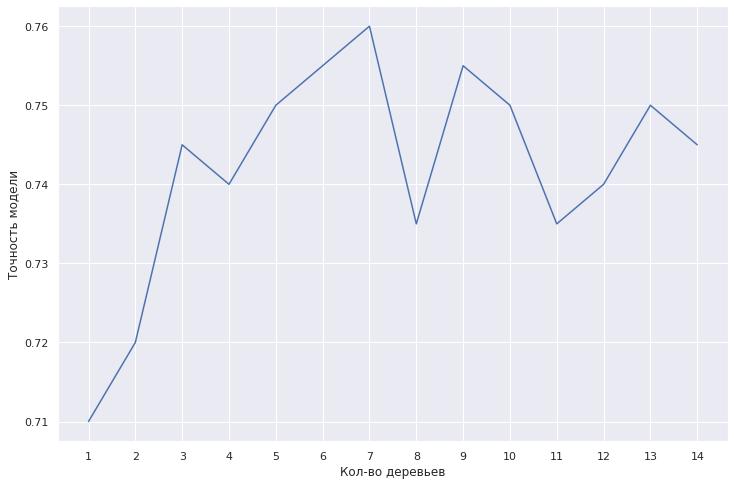

In [ ]:
arr = []
for i in range(1, 15):
  classifier_2 = RandomForestClassifier(max_depth = i, random_state = 0)
  classifier_2.fit(X_train, y_train)
  y_pred = classifier_2.predict(X_test)
  arr.append(accuracy_score(y_test, y_pred))
f = plt.figure(figsize = (12, 8))
plt.plot(range(1, 15), arr)
plt.xticks(range(1, 15))
plt.xlabel('Кол-во деревьев')
plt.ylabel('Точность модели')
plt.show()